# Klasifikasi Gambar Gunting, Batu, Kertas dengan Tensorflow

Dalam notebook ini kita akan mengklasifikasi gambar dengan computer vision pada API keras dengan Tensorflow versi 2.x. Gambar akan didownload menggunakan link yang disediakan kemudian akan dibagi menjadi set train dan set validation pada folder yang berbeda. Kemudian menggunakan ImageGenerator, akan diterapkan Augmentasi gambar dan terakhir hasil model dapat diuji coba dengan mengupload gambar pada notebook ini. Terdapat 726 gambar batu, 750 gambar gunting, dan 710 gambar kertas.

Created by Reyhan Alemmario

## Persiapan Data dan Folder

In [1]:
# Import Library yang akan digunakan
import os
import zipfile
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image

# Cek versi dari tensorflow
print(tf.__version__)

2.2.0-rc4


Using TensorFlow backend.


In [2]:
# Download file zip berisikan gambar
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-06 22:42:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.4MB/s    in 36s     

2020-05-06 22:42:36 (8.65 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# Ekstrak file Zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'rps-cv-images', 'paper', 'README_rpc-cv-images.txt', 'rock']

Setelah file diekstrak, terdapat 4 folder(paper, rock, scissors, dan rps-cv-images) dan file README. rps-cv-images memiliki folder yang sama dengan 3 folder lainnya. Kita akan membagi jumlah file menjadi 80% untuk train folder dan 20% untuk validation folder.

In [0]:
# Membuat Folder Training dan Validation
os.mkdir(os.path.join('/tmp/rockpaperscissors/', 'train/'))
os.mkdir(os.path.join('/tmp/rockpaperscissors/', 'validation/'))
os.mkdir(os.path.join('/tmp/rockpaperscissors/validation/', 'rock/'))
os.mkdir(os.path.join('/tmp/rockpaperscissors/validation/', 'paper/'))
os.mkdir(os.path.join('/tmp/rockpaperscissors/validation/', 'scissors/'))

In [0]:
# Memindahkan file gambar ke dua folder (gambar masih terduplikat)
folder_list = ['paper', 'scissors', 'rock']
for folder in folder_list:
  shutil.move('/tmp/rockpaperscissors/' + folder, '/tmp/rockpaperscissors/train')


Kita akan memindahkan 20% data dari folder train ke validation folder.

In [0]:
for folder in folder_list:
  fraction = int(len(os.listdir('/tmp/rockpaperscissors/train/' + folder + '/'))*0.2) #jumlah 20% data yang akan dipindahkan
  folder_dir = os.listdir('/tmp/rockpaperscissors/train/' + folder + '/')
  chosen_file = folder_dir[:fraction] #memilih 20% pada urutan awal
  for file in chosen_file:
    shutil.move('/tmp/rockpaperscissors/train/' + folder + '/' + file, '/tmp/rockpaperscissors/validation/'+ folder + '/' + file)

shutil.move memiliki kegunaan seperti cut sehingga kita tidak perlu khawatir ada file yang terduplikat antara folder train dan validation.

In [8]:
# Jumlah file gambar di folder train setelah dipindahkan
print('Pada folder train:')
print('Gambar gunting: ' + str(len(os.listdir('/tmp/rockpaperscissors/train/scissors/'))))
print('Gambar batu: ' + str(len(os.listdir('/tmp/rockpaperscissors/train/rock/'))))
print('Gambar kertas: ' + str(len(os.listdir('/tmp/rockpaperscissors/train/paper/'))))

Pada folder train:
Gambar gunting: 600
Gambar batu: 581
Gambar kertas: 570


In [11]:
# Jumlah file gambar di folder validation setelah menerima gambar yang dipindahkan
print('Pada folder validation:')
print('Gambar gunting: ' + str(len(os.listdir('/tmp/rockpaperscissors/validation/scissors/'))))
print('Gambar batu: ' + str(len(os.listdir('/tmp/rockpaperscissors/validation/rock/'))))
print('Gambar kertas: ' + str(len(os.listdir('/tmp/rockpaperscissors/validation/paper/'))))

Pada folder validation:
Gambar gunting: 150
Gambar batu: 145
Gambar kertas: 142


Gambar telah terpisahkan pada folder yang sesuai dan siap dilakukan augmentasi gambar.

## Augmentasi dari Generator Gambar

In [12]:
folder_train = '/tmp/rockpaperscissors/train/'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

folder_validation = '/tmp/rockpaperscissors/validation/'
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        folder_train, 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        folder_validation, 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


kita menggunakan class_mode categorical karena terdapat 3 jenis label.

## Model Sequential

In [13]:

model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax') # menggunakan 3 neuron di akhir dengan fungsi aktivasi softmax sebagai probabilitas
])
model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

Kita menggunakan optimizer berupa RMSprop dan loss categorical_crossentropy.

##Proses Training

In [14]:
model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=25,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=1)

Epoch 1/25
20/20 [==============================] - 12s 614ms/step - loss: 1.4496 - acc: 0.3575 - val_loss: 1.1081 - val_acc: 0.2800
Epoch 2/25
20/20 [==============================] - 12s 606ms/step - loss: 1.1109 - acc: 0.3775 - val_loss: 1.0922 - val_acc: 0.3100
Epoch 3/25
20/20 [==============================] - 12s 614ms/step - loss: 1.1537 - acc: 0.3625 - val_loss: 1.0889 - val_acc: 0.3600
Epoch 4/25
20/20 [==============================] - 12s 623ms/step - loss: 1.0641 - acc: 0.4450 - val_loss: 1.0726 - val_acc: 0.4330
Epoch 5/25
20/20 [==============================] - 12s 595ms/step - loss: 1.0321 - acc: 0.5499 - val_loss: 0.8510 - val_acc: 0.6900
Epoch 6/25
20/20 [==============================] - 12s 604ms/step - loss: 0.9585 - acc: 0.5775 - val_loss: 0.8107 - val_acc: 0.7500
Epoch 7/25
20/20 [==============================] - 12s 604ms/step - loss: 0.7617 - acc: 0.6850 - val_loss: 0.5760 - val_acc: 0.7500
Epoch 8/25
20/20 [==============================] - 12s 619ms/step - 

Setiap kali proses training dilakukan akan menghasilkan nilai akurasi yang sedikit berbeda, didapatkan berkisar diantara 90%.

Saving 2EAkMCm7ZLnNoBQ7.png to 2EAkMCm7ZLnNoBQ7 (2).png
batu


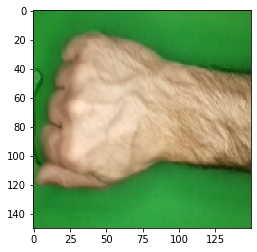

In [18]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes = classes.tolist()
  
if classes[0][0] == 1:
  print('kertas')
elif classes[0][2] == 1:
  print('gunting')
else:
  print('batu')

In [0]:
# !rm -rf '/tmp/rockpaperscissors'
#uncomment sebelum restart runtime